This notebook contains code that runs kernel ridge regression on boston housing dataset and plots the effects of parameters on cross_val_score(MSE). Kernel Ridge Regression is implemented from scratch as the class `RidgeRegressor` which can be found in the file `ridge_regressor.py`. Boston Housing Dataset has been downloaded from Kaggle.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from ridge_regressor import RidgeRegressor

In [3]:
import random
random.seed(10)

In [4]:
features = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
label = "MEDV"
names = features + [label]

In [8]:
df = pd.read_csv("./boston-housing.csv",names=names,sep="\s+")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
df.pop("B")

0      396.90
1      396.90
2      392.83
3      394.63
4      396.90
        ...  
501    391.99
502    396.90
503    396.90
504    393.45
505    396.90
Name: B, Length: 506, dtype: float64

In [10]:
features.remove("B")
features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


### Splitting Dataset into training and test sets

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df[features],df[label],random_state=10,train_size=0.75)

### Linear Regression for base score



In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
((model.predict(X_test) - y_test)**2).mean()

31.488161766796548

In [10]:
# model = RidgeRegressor().fit(X_train,y_train)
# model.score(X_test,y_test)

### Parameter grids for Cross Validation

In [11]:
params = {
    "l": [1/(2**i) for i in range(-4,5)],
    "c": np.linspace(-1000,1000,7),
}
params


{'l': [16.0, 8.0, 4.0, 2.0, 1.0, 0.5, 0.25, 0.125, 0.0625],
 'c': array([-1000.        ,  -666.66666667,  -333.33333333,     0.        ,
          333.33333333,   666.66666667,  1000.        ])}

In [12]:
grid = GridSearchCV(RidgeRegressor(kernel="linear"),params,cv=5,verbose=3,n_jobs=-1,scoring="neg_mean_squared_error")
grid.fit(X_train,y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5, estimator=RidgeRegressor(), n_jobs=-1,
             param_grid={'c': array([-1000.        ,  -666.66666667,  -333.33333333,     0.        ,
         333.33333333,   666.66666667,  1000.        ]),
                         'l': [16.0, 8.0, 4.0, 2.0, 1.0, 0.5, 0.25, 0.125,
                               0.0625]},
             scoring='neg_mean_squared_error', verbose=3)

In [13]:
grid.best_params_

{'c': -333.33333333333337, 'l': 0.125}

In [14]:
grid.best_score_

-22.276697561763296

In [15]:
grid.cv_results_

{'mean_fit_time': array([25.59139071, 25.21020999, 25.70608435, 27.44782877, 28.10028481,
        28.03047132, 28.08652148, 28.2945653 , 28.6151082 , 28.31630721,
        28.66363301, 28.57291846, 28.70866289, 28.89045506, 28.73827925,
        28.88144488, 28.58080006, 28.92906904, 29.21669998, 29.00945411,
        29.0645072 , 29.36490407, 28.80978789, 29.09083681, 29.43751016,
        29.6046629 , 29.87753382, 29.68026099, 29.227671  , 29.43750997,
        29.61443701, 29.26616793, 28.88957467, 29.29907985, 29.12354918,
        29.78059287, 30.31516399, 30.04309111, 29.85339799, 29.87972784,
        29.80951571, 29.6832531 , 29.573347  , 29.61643195, 29.51909218,
        29.45167232, 29.3357821 , 29.47979708, 29.6702879 , 29.16084938,
        29.81809254, 29.85978127, 29.52587385, 29.8053268 , 29.97686839,
        30.1095139 , 30.28763752, 30.57327399, 29.91962137, 30.34747767,
        29.22447991, 25.10529084, 24.17198534]),
 'std_fit_time': array([0.50017989, 0.50355461, 0.23052565

In [16]:
print(grid)

GridSearchCV(cv=5, estimator=RidgeRegressor(), n_jobs=-1,
             param_grid={'c': array([-1000.        ,  -666.66666667,  -333.33333333,     0.        ,
         333.33333333,   666.66666667,  1000.        ]),
                         'l': [16.0, 8.0, 4.0, 2.0, 1.0, 0.5, 0.25, 0.125,
                               0.0625]},
             scoring='neg_mean_squared_error', verbose=3)


In [17]:
df_linear = pd.DataFrame(grid.cv_results_)
df_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_c,param_l,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,25.591391,0.500180,6.810993,0.070088,-1000.0,16.0,"{'c': -1000.0, 'l': 16.0}",-19.328496,-16.098935,-26.831746,-17.538504,-33.657755,-22.691087,6.614007,52
1,25.210210,0.503555,6.745768,0.097199,-1000.0,8.0,"{'c': -1000.0, 'l': 8.0}",-19.905825,-16.066206,-26.289210,-17.694358,-33.335317,-22.658183,6.369533,48
2,25.706084,0.230526,6.909331,0.053835,-1000.0,4.0,"{'c': -1000.0, 'l': 4.0}",-20.264588,-16.115275,-25.901712,-17.762333,-33.020031,-22.612788,6.170678,40
3,27.447829,0.879926,7.034995,0.187780,-1000.0,2.0,"{'c': -1000.0, 'l': 2.0}",-20.401217,-16.230999,-25.592436,-17.725166,-32.637807,-22.517525,5.980653,33
4,28.100285,0.319186,7.081271,0.130855,-1000.0,1.0,"{'c': -1000.0, 'l': 1.0}",-20.397924,-16.433562,-25.341057,-17.638957,-32.197664,-22.401833,5.777858,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,29.919621,0.496229,7.349354,0.117836,1000.0,1.0,"{'c': 1000.0, 'l': 1.0}",-20.403249,-16.436111,-25.331817,-17.646569,-32.195892,-22.402728,5.774169,28
59,30.347478,0.765707,7.312054,0.095040,1000.0,0.5,"{'c': 1000.0, 'l': 0.5}",-20.364246,-16.708932,-25.157307,-17.582765,-31.777740,-22.318198,5.572245,22
60,29.224480,1.564283,6.983731,0.636827,1000.0,0.25,"{'c': 1000.0, 'l': 0.25}",-20.347816,-16.984486,-25.054315,-17.571502,-31.453987,-22.282421,5.400085,16
61,25.105291,0.492725,5.456813,0.271985,1000.0,0.125,"{'c': 1000.0, 'l': 0.125}",-20.351843,-17.197904,-25.001924,-17.588698,-31.243679,-22.276810,5.278450,4


In [18]:
df1 = df_linear[["param_c","param_l"]]
df1["mse"] = -df_linear["mean_test_score"]
df1.columns = ["c","l","mse"]
df1

C:\Users\Saif\AppData\Local\Temp\ipykernel_19720\1584186949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["mse"] = -df_linear["mean_test_score"]


,c,l,mse
0,-1000.0,16.0,22.691087
1,-1000.0,8.0,22.658183
2,-1000.0,4.0,22.612788
3,-1000.0,2.0,22.517525
4,-1000.0,1.0,22.401833
...,...,...,...
58,1000.0,1.0,22.402728
59,1000.0,0.5,22.318198
60,1000.0,0.25,22.282421
61,1000.0,0.125,22.276810


C:\Users\Saif\AppData\Local\Temp\ipykernel_19720\2522940076.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in df1.groupby(["c"]):


Text(0.5, 1.0, 'Linear Kernel: log2(l) vs MSE')

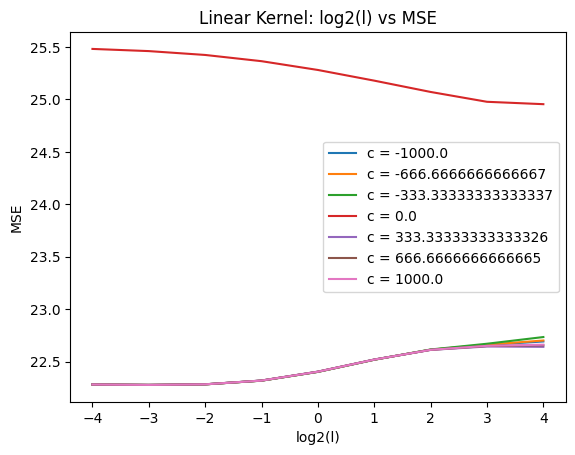

In [19]:

for name,group in df1.groupby(["c"]):
    plt.plot(group["l"].apply(lambda x: np.log2(x)),group["mse"],label=f"c = {name}")
plt.legend()
plt.xlabel("log2(l)")
plt.ylabel("MSE")
plt.title("Linear Kernel: log2(l) vs MSE")

C:\Users\Saif\AppData\Local\Temp\ipykernel_19720\1401690948.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name,group in df1.groupby(["l"]):


Text(0.5, 1.0, 'Linear Kernel: c vs MSE')

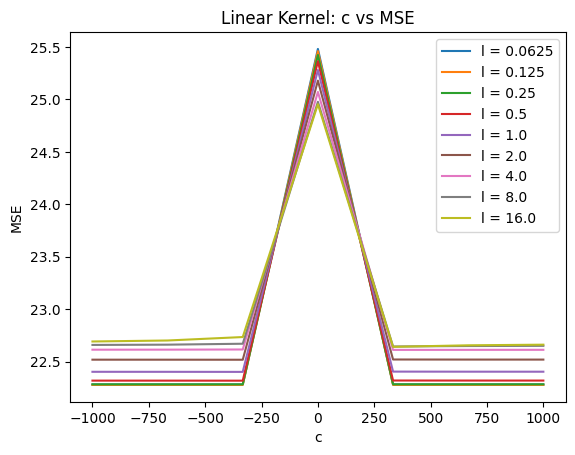

In [20]:

for name,group in df1.groupby(["l"]):
    plt.plot(group["c"],group["mse"],label=f"l = {name}")
plt.legend()
plt.xlabel("c")
plt.ylabel("MSE")
plt.title("Linear Kernel: c vs MSE")

In [21]:
params = {
    "l": [(2**i) for i in range(-4,5)],
    "d": np.arange(1, 4),
    "r": np.linspace(-1000,1000,7),
}


In [22]:
grid = GridSearchCV(RidgeRegressor(kernel="polynomial"),params,cv=5,verbose=3,n_jobs=-1,scoring="neg_mean_squared_error")
grid.fit(X_train,y_train)

Fitting 5 folds for each of 189 candidates, totalling 945 fits


GridSearchCV(cv=5, estimator=RidgeRegressor(kernel='polynomial'), n_jobs=-1,
             param_grid={'d': array([1, 2, 3]),
                         'l': [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16],
                         'r': array([-1000.        ,  -666.66666667,  -333.33333333,     0.        ,
         333.33333333,   666.66666667,  1000.        ])},
             scoring='neg_mean_squared_error', verbose=3)

In [23]:
grid.best_params_

{'d': 2, 'l': 16, 'r': 1000.0}

In [24]:
grid.best_score_

-15.285873755818887

In [25]:
df_polynomial = pd.DataFrame(grid.cv_results_)
df_polynomial

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_d,param_l,param_r,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,28.173884,0.598615,7.379474,0.192487,1,0.0625,-1000.0,"{'d': 1, 'l': 0.0625, 'r': -1000.0}",-2.036087e+01,-1.733510e+01,-2.497765e+01,-1.760877e+01,-3.112196e+01,-2.228087e+01,5.204096e+00,51
1,28.010125,0.588873,7.340578,0.142240,1,0.0625,-666.666667,"{'d': 1, 'l': 0.0625, 'r': -666.6666666666667}",-2.036077e+01,-1.733514e+01,-2.497781e+01,-1.760866e+01,-3.112192e+01,-2.228086e+01,5.204118e+00,50
2,28.096295,0.381249,7.268969,0.172153,1,0.0625,-333.333333,"{'d': 1, 'l': 0.0625, 'r': -333.33333333333337}",-2.036052e+01,-1.733528e+01,-2.497833e+01,-1.760836e+01,-3.112180e+01,-2.228086e+01,5.204176e+00,49
3,29.004468,0.171367,7.345165,0.121044,1,0.0625,0.0,"{'d': 1, 'l': 0.0625, 'r': 0.0}",-2.460884e+01,-2.007857e+01,-2.507426e+01,-2.263939e+01,-3.500849e+01,-2.548191e+01,5.078587e+00,106
4,29.777002,0.316825,7.471229,0.149426,1,0.0625,333.333333,"{'d': 1, 'l': 0.0625, 'r': 333.33333333333326}",-2.036155e+01,-1.733472e+01,-2.497627e+01,-1.760960e+01,-3.112231e+01,-2.228089e+01,5.203943e+00,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,30.175936,0.376740,7.426747,0.107265,3,16,-333.333333,"{'d': 3, 'l': 16, 'r': -333.33333333333337}",-2.616851e+08,-3.326682e+08,-4.480696e+06,-2.246738e+07,-6.625777e+07,-1.375118e+08,1.338018e+08,146
185,29.795752,0.457359,7.512319,0.166446,3,16,0.0,"{'d': 3, 'l': 16, 'r': 0.0}",-3.168234e+07,-2.062554e+05,-1.755003e+08,-3.632984e+07,-2.134258e+07,-5.301226e+07,6.249484e+07,132
186,29.880326,0.518894,6.894769,0.311087,3,16,333.333333,"{'d': 3, 'l': 16, 'r': 333.33333333333326}",-1.673893e+07,-7.581495e+10,-2.068514e+07,-8.179327e+06,-1.151315e+08,-1.519514e+10,3.030993e+10,186
187,27.828013,0.499867,5.245784,0.326836,3,16,666.666667,"{'d': 3, 'l': 16, 'r': 666.6666666666665}",-2.378924e+10,-1.438602e+09,-3.387098e+06,-5.791482e+08,-8.185939e+07,-5.178447e+09,9.319420e+09,180


In [26]:
df_polynomial.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
count,189.000000,189.000000,189.000000,189.000000,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02,189.000000
mean,29.849713,0.495405,7.435969,0.162534,-6.988111e+09,-1.258566e+09,-1.983201e+10,-3.617926e+08,-3.066799e+08,-5.749431e+09,1.133497e+10,95.000000
std,0.551376,0.185389,0.313798,0.081380,7.500763e+10,7.553225e+09,2.698593e+11,3.234141e+09,2.007477e+09,5.592582e+10,1.118191e+11,54.703748
min,25.679170,0.140471,4.052380,0.026608,-1.018484e+12,-7.581495e+10,-3.710084e+12,-4.370258e+10,-2.247791e+10,-7.420818e+11,2.250206e+00,1.000000
25%,29.693226,0.384301,7.409394,0.129458,-1.148413e+07,-2.344906e+07,-5.086630e+06,-9.622388e+06,-1.463662e+07,-1.093747e+08,5.204022e+00,48.000000
50%,29.862773,0.472705,7.451082,0.151864,-2.218143e+01,-1.733491e+01,-2.586556e+01,-2.140417e+01,-3.333532e+01,-2.270047e+01,6.320593e+00,95.000000
75%,30.052666,0.585753,7.504539,0.180166,-1.990031e+01,-1.609893e+01,-2.497627e+01,-1.773894e+01,-2.955368e+01,-2.227687e+01,1.338018e+08,142.000000
max,31.668945,1.707169,8.012980,0.880367,-8.725829e+00,-1.073714e+01,-1.438266e+01,-1.672283e+01,-2.002385e+01,-1.528587e+01,1.484001e+12,189.000000


In [27]:
df1 = df_polynomial[["param_d","param_l","param_r"]]
df1["mse"] = -df_polynomial["mean_test_score"]
df1.columns = ["d","l","r","mse"]
df1

C:\Users\Saif\AppData\Local\Temp\ipykernel_19720\3681691839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["mse"] = -df_polynomial["mean_test_score"]


,d,l,r,mse
0,1,0.0625,-1000.0,2.228087e+01
1,1,0.0625,-666.666667,2.228086e+01
2,1,0.0625,-333.333333,2.228086e+01
3,1,0.0625,0.0,2.548191e+01
4,1,0.0625,333.333333,2.228089e+01
...,...,...,...,...
184,3,16,-333.333333,1.375118e+08
185,3,16,0.0,5.301226e+07
186,3,16,333.333333,1.519514e+10
187,3,16,666.666667,5.178447e+09


In [28]:
df1["d"].value_counts()

1    63
2    63
3    63
Name: d, dtype: int64

In [29]:
df1[df1["mse"]>30]['d'].value_counts()

3    63
2    19
Name: d, dtype: int64

In [30]:
df1["l"].value_counts()

0.0625     21
0.1250     21
0.2500     21
0.5000     21
1.0000     21
2.0000     21
4.0000     21
8.0000     21
16.0000    21
Name: l, dtype: int64

In [31]:
df1[df1["mse"]>30]['l'].value_counts()

0.0625     14
0.1250     14
0.2500     11
1.0000      8
0.5000      7
2.0000      7
4.0000      7
8.0000      7
16.0000     7
Name: l, dtype: int64

In [32]:
df1["r"].value_counts()

-1000.000000    27
-666.666667     27
-333.333333     27
 0.000000       27
 333.333333     27
 666.666667     27
 1000.000000    27
Name: r, dtype: int64

In [33]:
df1[df1["mse"]>30]['r'].value_counts()

-666.666667     12
-333.333333     12
 0.000000       12
 666.666667     12
 1000.000000    12
-1000.000000    11
 333.333333     11
Name: r, dtype: int64

In [34]:
# Ignoring parameters with high mse
df1 = df1[df1["mse"]<30]
df1["l"] = df1["l"].apply(lambda x: np.log2(x))

C:\Users\Saif\AppData\Local\Temp\ipykernel_19720\3625989464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["l"] = df1["l"].apply(lambda x: np.log2(x))


Text(0.5, 1.0, 'Polynomial Kernel: l vs MSE')

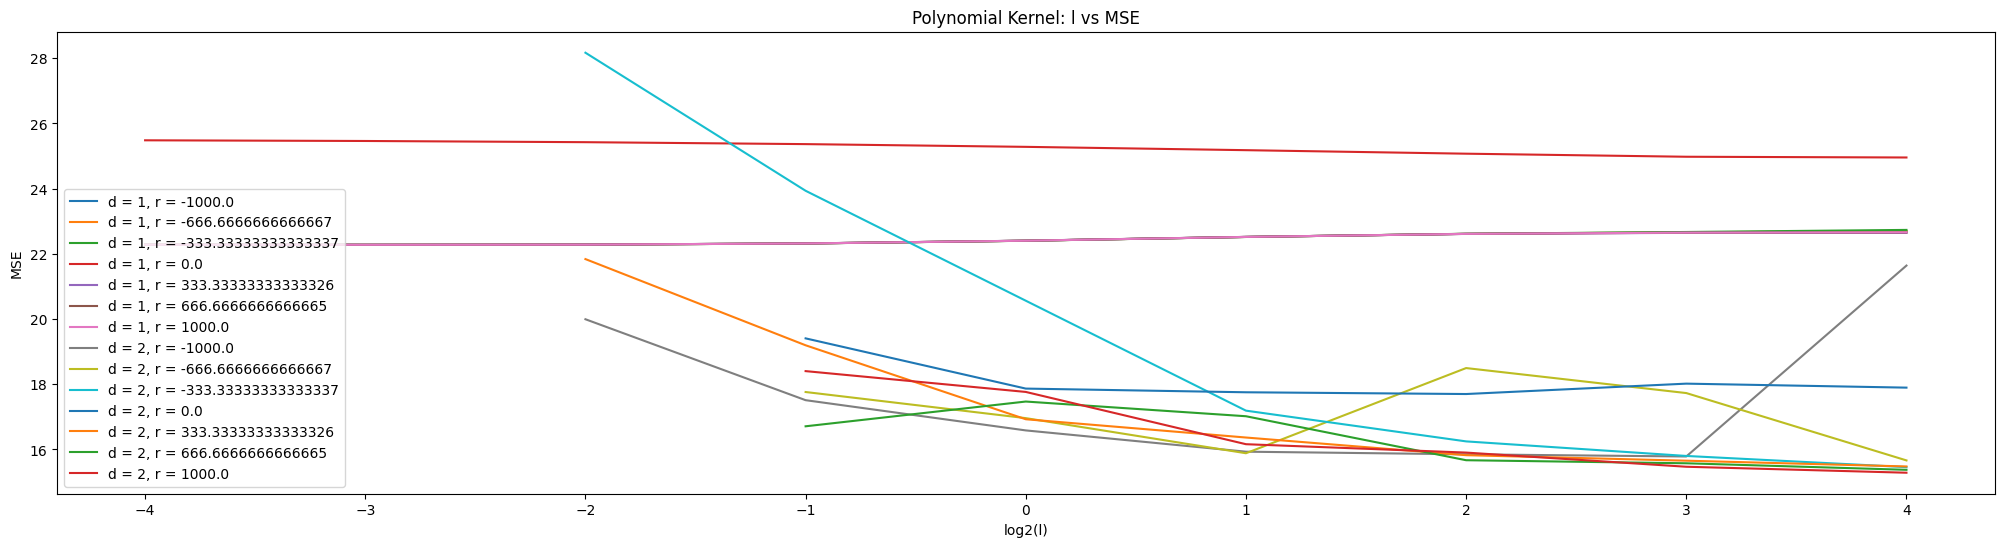

In [35]:
plt.figure(figsize=(25,6))
for name,group in df1.groupby(["d","r"]):
    plt.plot(group["l"],group["mse"],label=f"d = {name[0]}, r = {name[1]}")
plt.legend()
# plt.yticks(np.linspace(18,24,16))
plt.xlabel("log2(l)")
plt.ylabel("MSE")
plt.title("Polynomial Kernel: l vs MSE")

Text(0.5, 1.0, 'Polynomial Kernel: d vs MSE')

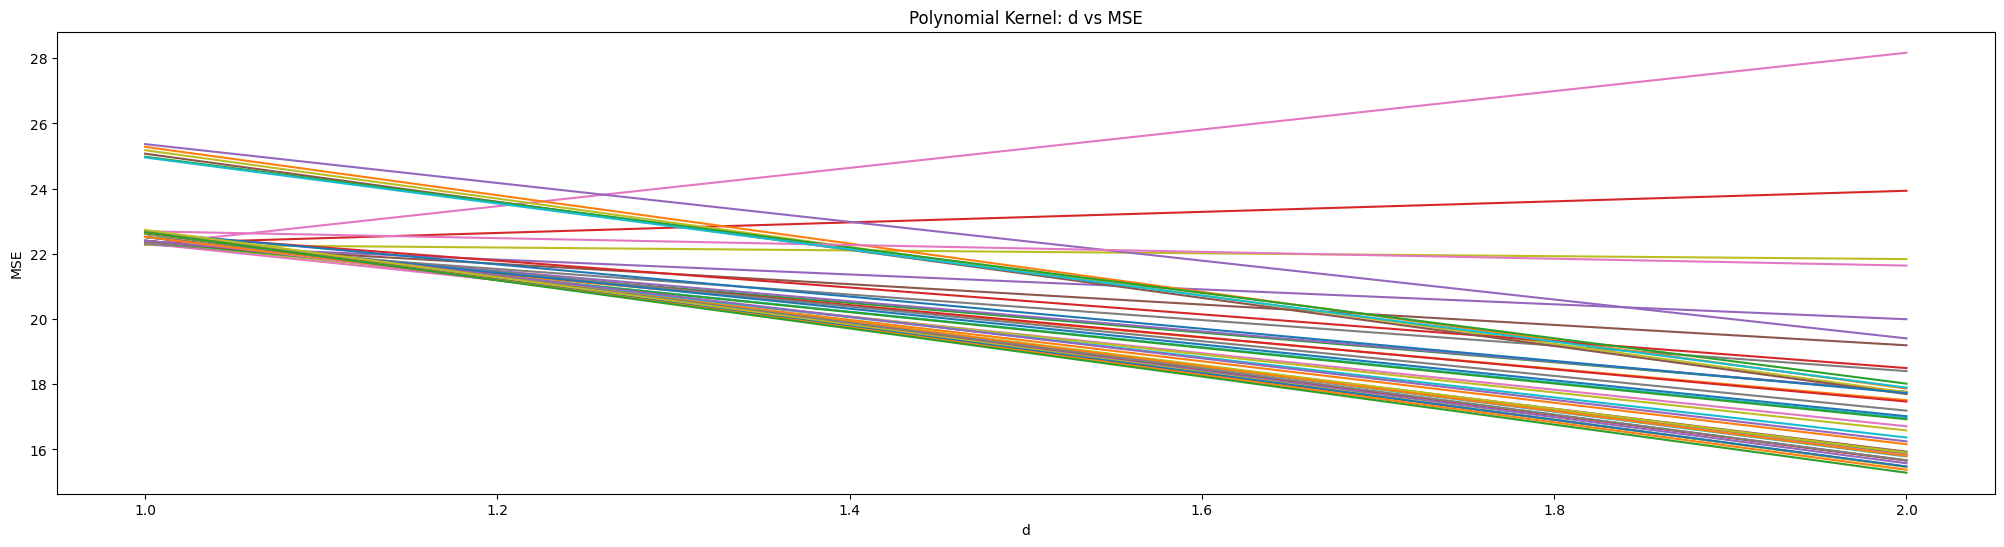

In [36]:
plt.figure(figsize=(25,6))
for name,group in df1.groupby(["l","r"]):
    plt.plot(group["d"],group["mse"],label=f"l = {name[0]}, r = {name[1]}")
# plt.legend()
plt.xlabel("d")
plt.ylabel("MSE")
plt.title("Polynomial Kernel: d vs MSE")

Text(0.5, 1.0, 'Polynomial Kernel: r vs MSE')

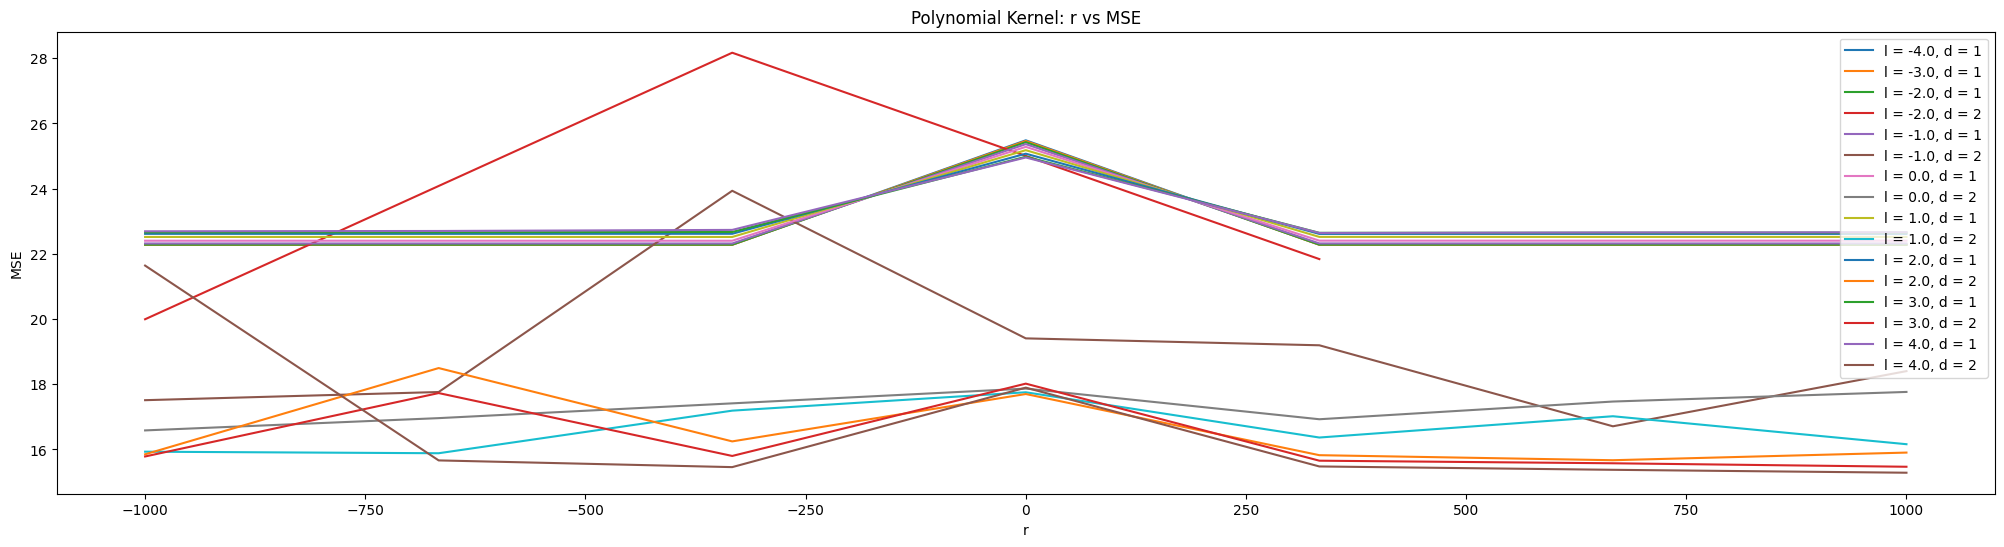

In [37]:
plt.figure(figsize=(25,6))

for name,group in df1.groupby(["l","d"]):
    plt.plot(group["r"],group["mse"],label=f"l = {name[0]}, d = {name[1]}")
plt.legend()
plt.xlabel("r")
plt.ylabel("MSE")
plt.title("Polynomial Kernel: r vs MSE")